<a href="https://colab.research.google.com/github/PhanThyAn/Lab-2_MayHoc/blob/main/Lab_7_20130195_PhanThiAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
# code
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/Lab_6'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab_6


In [32]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn import svm
from sklearn import tree
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from prettytable import PrettyTable
from numpy import set_printoptions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,ComplementNB
from numpy import average
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.stats import mode

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [37]:
#code
iris= datasets.load_iris(as_frame=True)
clf = svm.SVC(kernel='sigmoid', random_state=0)
X = iris.data
y = iris.target
scores = cross_validate(clf, X, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))


['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [38]:
clf = RandomForestClassifier()
clf.fit(iris['data'], iris['target'])
feature_sr = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp = feature_sr.head(30)
# print(feature_imp)
# sns.barplot(x=feature_sr, y=feature_sr.index)
x_new1 = iris['data'][feature_imp.index]
scores = cross_validate(clf, x_new1, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.96


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [27]:
def scoreMetrix(clf, x, y, scores=None):
  metrix = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
  for s in metrix:
    print(s.upper() + ':')
    score = cross_validate(clf, x, y, scoring=s, cv=10 )
    for key in score.keys():
      if scores is not None and key == 'test_score':
        scores.append(np.mean(score[key]))
      print(key + ':', np.mean(score[key]))
    print('----------')
  return scores;

In [30]:
# code
mnist = datasets.load_digits(as_frame=True)
X = mnist.data
y = mnist.target
# mnist
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(X)
clusters = kmeans.predict(X)
kmeans.cluster_centers_.shape
clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

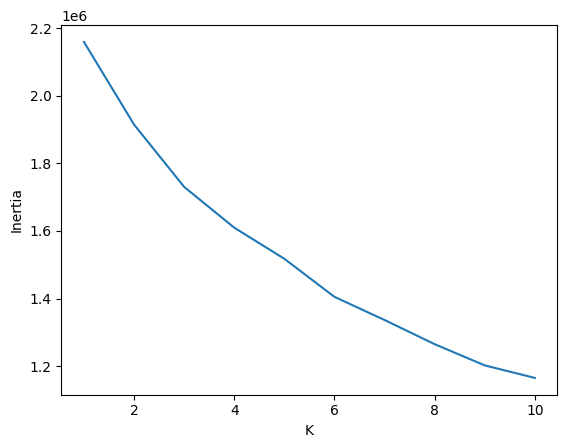

In [31]:
sse = []
k_range = range(1, 11)
for k in k_range:
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans.fit(X)
 sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [33]:
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
 print(mask)
 labels[mask] = mode(mnist.target[mask])[0]
 print(labels[mask])
acc = metrics.accuracy_score(y, labels)
ps = metrics.precision_score(y, labels, average='macro')
rs = metrics.recall_score(y, labels, average='macro')
fs = metrics.f1_score(y, labels, average='macro')
KMEAN = ('Kmean', round(acc, 2), round(ps, 2),round(rs, 2),round(fs, 2))
print('Accuracy:', acc)
print('Precision:', ps)
print('Recall:', rs)
print('F1:', fs)

[False False False ... False False False]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[False False False ... False False False]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[False False False ... False False False]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5

<ipython-input-33-78c44c90e6f6>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [15]:
# code
# mnist = datasets.load_digits(as_frame=True)
X = mnist.data
y = mnist.target

clf=RandomForestClassifier(n_estimators=100)
clf.fit(mnist['data'], mnist['target'])
rdForest= scoreMetrix(clf,X, y, scores=['Random Forest'])

# scores_acc = cross_validate(clf, X, y, scoring='accuracy', cv=10)
# scores_pre = cross_validate(clf, X, y, scoring='precision_macro', cv=10)
# scores_recall = cross_validate(clf, X, y, scoring='recall_macro', cv=10)
# scores_f1 = cross_validate(clf, X, y, scoring='f1_macro', cv=10)
# print(sorted(scores.keys()))
# print(np.mean(scores['test_score']))



ACCURACY:
fit_time: 0.6065888643264771
score_time: 0.026060080528259276
test_score: 0.9482495344506517
----------
PRECISION_MACRO:
fit_time: 0.525238299369812
score_time: 0.02365884780883789
test_score: 0.9578514518247492
----------
RECALL_MACRO:
fit_time: 0.38241286277770997
score_time: 0.016678476333618165
test_score: 0.9537237702098385
----------
F1_MACRO:
fit_time: 0.38760528564453123
score_time: 0.01666104793548584
test_score: 0.9461210045793385
----------


In [19]:
k_range = range(1, 10, 2)
accs =[ ]
precision= [ ]
recalls = []
f1measure = [ ]
knn=[]
for i in k_range:
  kNN = KNeighborsClassifier(n_neighbors=i);
  print('i=', i)
  score = scoreMetrix(kNN,X, y, scores=['KNN'])
  knn.append(score)
  accs.append(score[1])
  precision.append(score[2])
  recalls.append(score[3])
  f1measure.append(score[4])

 

i= 1
ACCURACY:
fit_time: 0.003286004066467285
score_time: 0.01098792552947998
test_score: 0.9749627560521414
----------
PRECISION_MACRO:
fit_time: 0.0031248092651367187
score_time: 0.012164592742919922
test_score: 0.9774357213220217
----------
RECALL_MACRO:
fit_time: 0.0032499551773071287
score_time: 0.013638520240783691
test_score: 0.9750085999312006
----------
F1_MACRO:
fit_time: 0.0037591218948364257
score_time: 0.012319397926330567
test_score: 0.9749172331935332
----------
i= 3
ACCURACY:
fit_time: 0.0032684803009033203
score_time: 0.010655879974365234
test_score: 0.9766325263811299
----------
PRECISION_MACRO:
fit_time: 0.003269481658935547
score_time: 0.01233813762664795
test_score: 0.9788610398545382
----------
RECALL_MACRO:
fit_time: 0.0031673192977905275
score_time: 0.012279129028320313
test_score: 0.9766821465428277
----------
F1_MACRO:
fit_time: 0.0033006191253662108
score_time: 0.012198472023010254
test_score: 0.9768109540040122
----------
i= 5
ACCURACY:
fit_time: 0.003368186

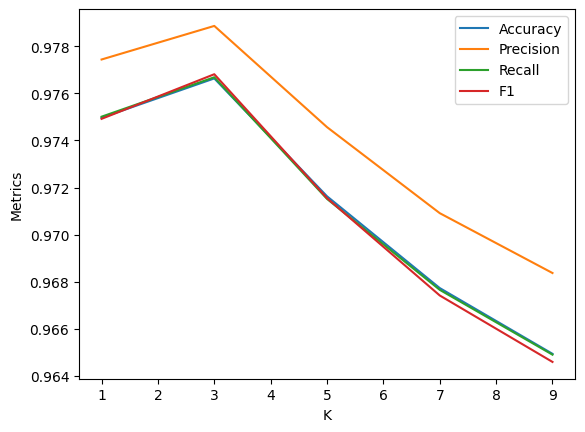

In [20]:
plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, f1measure, label='F1')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [24]:
knn[1]

['KNN',
 0.9766325263811299,
 0.9788610398545382,
 0.9766821465428277,
 0.9768109540040122]

In [23]:
clg = GaussianNB()
nb = scoreMetrix(clg, X, y, scores=['Naive Bayes'])
print(nb)

ACCURACY:
fit_time: 0.0043220996856689455
score_time: 0.0026535987854003906
test_score: 0.8113904407200497
----------
PRECISION_MACRO:
fit_time: 0.004453778266906738
score_time: 0.0038115978240966797
test_score: 0.8480837289405493
----------
RECALL_MACRO:
fit_time: 0.00456695556640625
score_time: 0.0042076587677001955
test_score: 0.8114189886480908
----------
F1_MACRO:
fit_time: 0.00420222282409668
score_time: 0.0036511659622192384
test_score: 0.8090382615408214
----------
['Naive Bayes', 0.8113904407200497, 0.8480837289405493, 0.8114189886480908, 0.8090382615408214]


In [35]:
t = PrettyTable(['Classfication', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(KMEAN)
t.add_row(rdForest)
t.add_row(knn[1])
t.add_row(nb)
print(t)

+---------------+--------------------+--------------------+--------------------+--------------------+
| Classfication |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
|     Kmean     |        0.79        |        0.8         |        0.79        |        0.79        |
| Random Forest | 0.9482495344506517 | 0.9578514518247492 | 0.9537237702098385 | 0.9461210045793385 |
|      KNN      | 0.9766325263811299 | 0.9788610398545382 | 0.9766821465428277 | 0.9768109540040122 |
|  Naive Bayes  | 0.8113904407200497 | 0.8480837289405493 | 0.8114189886480908 | 0.8090382615408214 |
+---------------+--------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
print('Supervised learing better Unsupervised learing')

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [10]:
mnist = datasets.load_digits(as_frame=True)
X = mnist.data
y = mnist.target
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

[7 9 4 ... 4 1 4]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [11]:
metrics.cluster.completeness_score(y, cluster.labels_)

0.8790955851724198

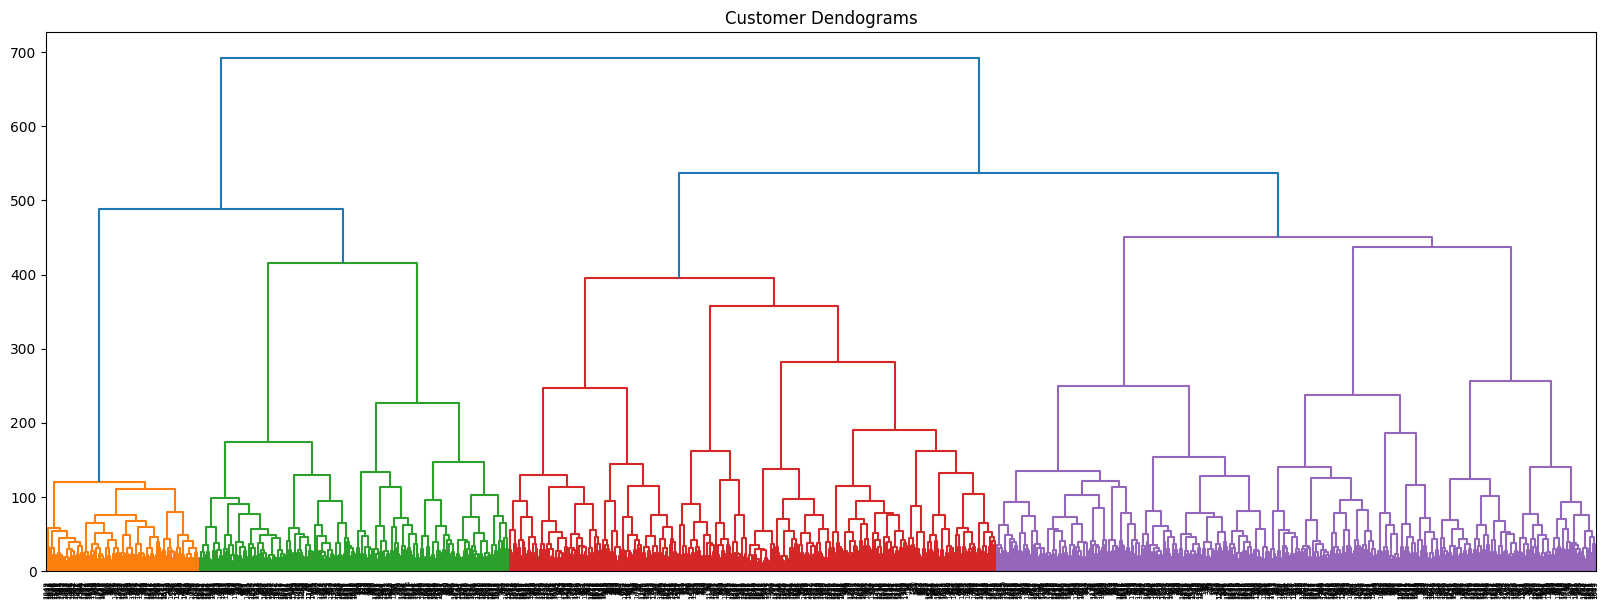

In [12]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





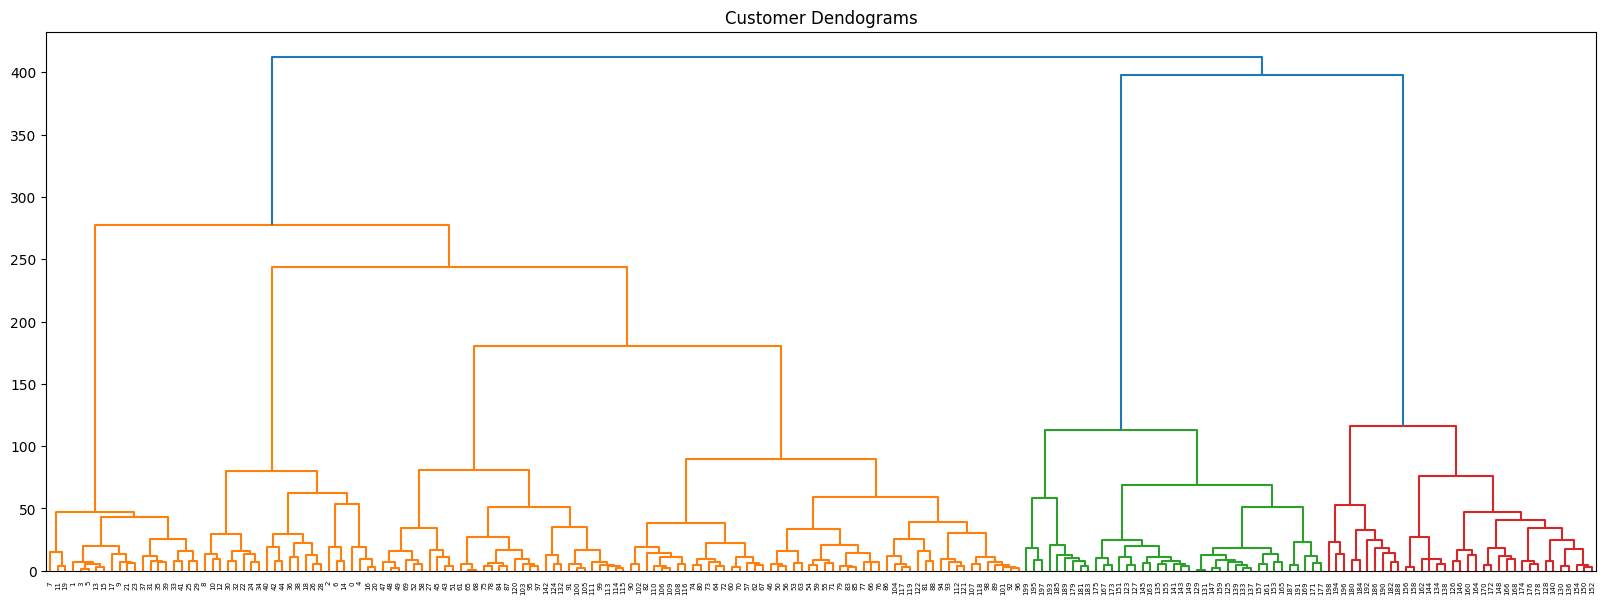

In [7]:
#code
dataset = pd.read_csv('shopping-data.csv')
dataset = dataset.drop(columns=['CustomerID','Genre'])
dataset.head()
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(dataset, method='ward'))
# bo CustomerID. Genre


*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

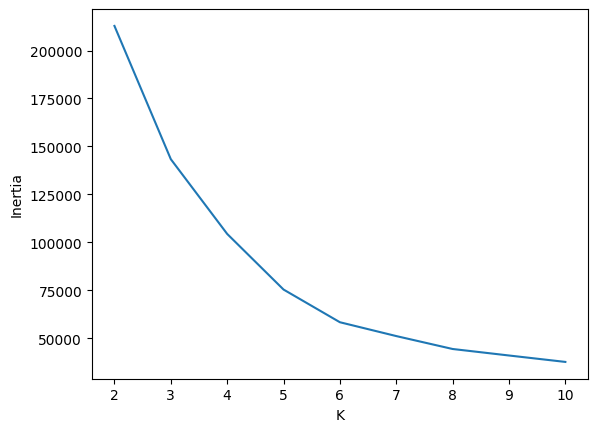

In [8]:
#code
k_range = range(2,11)
sse=[]
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state = 0)
  kmeans.fit(dataset)
  sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [9]:
#code
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(dataset)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#Finally,
Save a copy in your Github. Remember renaming the notebook.